In [2]:
#https://github.com/gchoi/Dataset/blob/master/ToyotaCorolla.csv
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from random import randint
os.getcwd()
os.chdir('/Users/niloofarzarifi/Desktop/Udacity/khaneh/ToyotaCorolla/')


In [3]:
data = pd.read_csv('ToyotaCorolla.csv')



In [4]:
data.head(3)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165


In [5]:

data.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [6]:
#result.overall_satisfaction.value_counts()
print data.shape
print data.columns
data.isnull().sum()

(1436, 10)
Index([u'Price', u'Age', u'KM', u'FuelType', u'HP', u'MetColor', u'Automatic',
       u'CC', u'Doors', u'Weight'],
      dtype='object')


Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [7]:
print data.duplicated().sum()
data[data.duplicated()] #remove the following row 

1


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
113,24950,8,13253,Diesel,116,1,0,2000,5,1320


In [8]:
data.drop_duplicates(keep='first',inplace=True) 

In [9]:
data.shape

(1435, 10)

In [10]:
(data.sort_values(by=['Age'])).head(10) #what age stands for? , I keep it otherwise,
#data[data['Age']==1]=round(data['Age'].mean()) #or data[data['Age']<16]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
185,18245,1,1,Petrol,110,1,0,1600,5,1075
184,17795,1,1,Petrol,98,1,0,1400,4,1100
183,21500,2,15,Petrol,110,1,0,1600,5,1130
182,21125,2,225,Petrol,97,1,0,1400,5,1110
109,32500,4,1,Diesel,116,0,0,2000,5,1480
110,31000,4,4000,Diesel,116,1,0,2000,5,1480
111,31275,4,1500,Diesel,116,1,0,2000,5,1480
179,22500,6,3000,Petrol,110,0,0,1600,5,1130
181,18700,7,450,Petrol,97,1,0,1400,5,1110
180,18500,7,2000,Petrol,110,0,0,1600,5,1075


/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


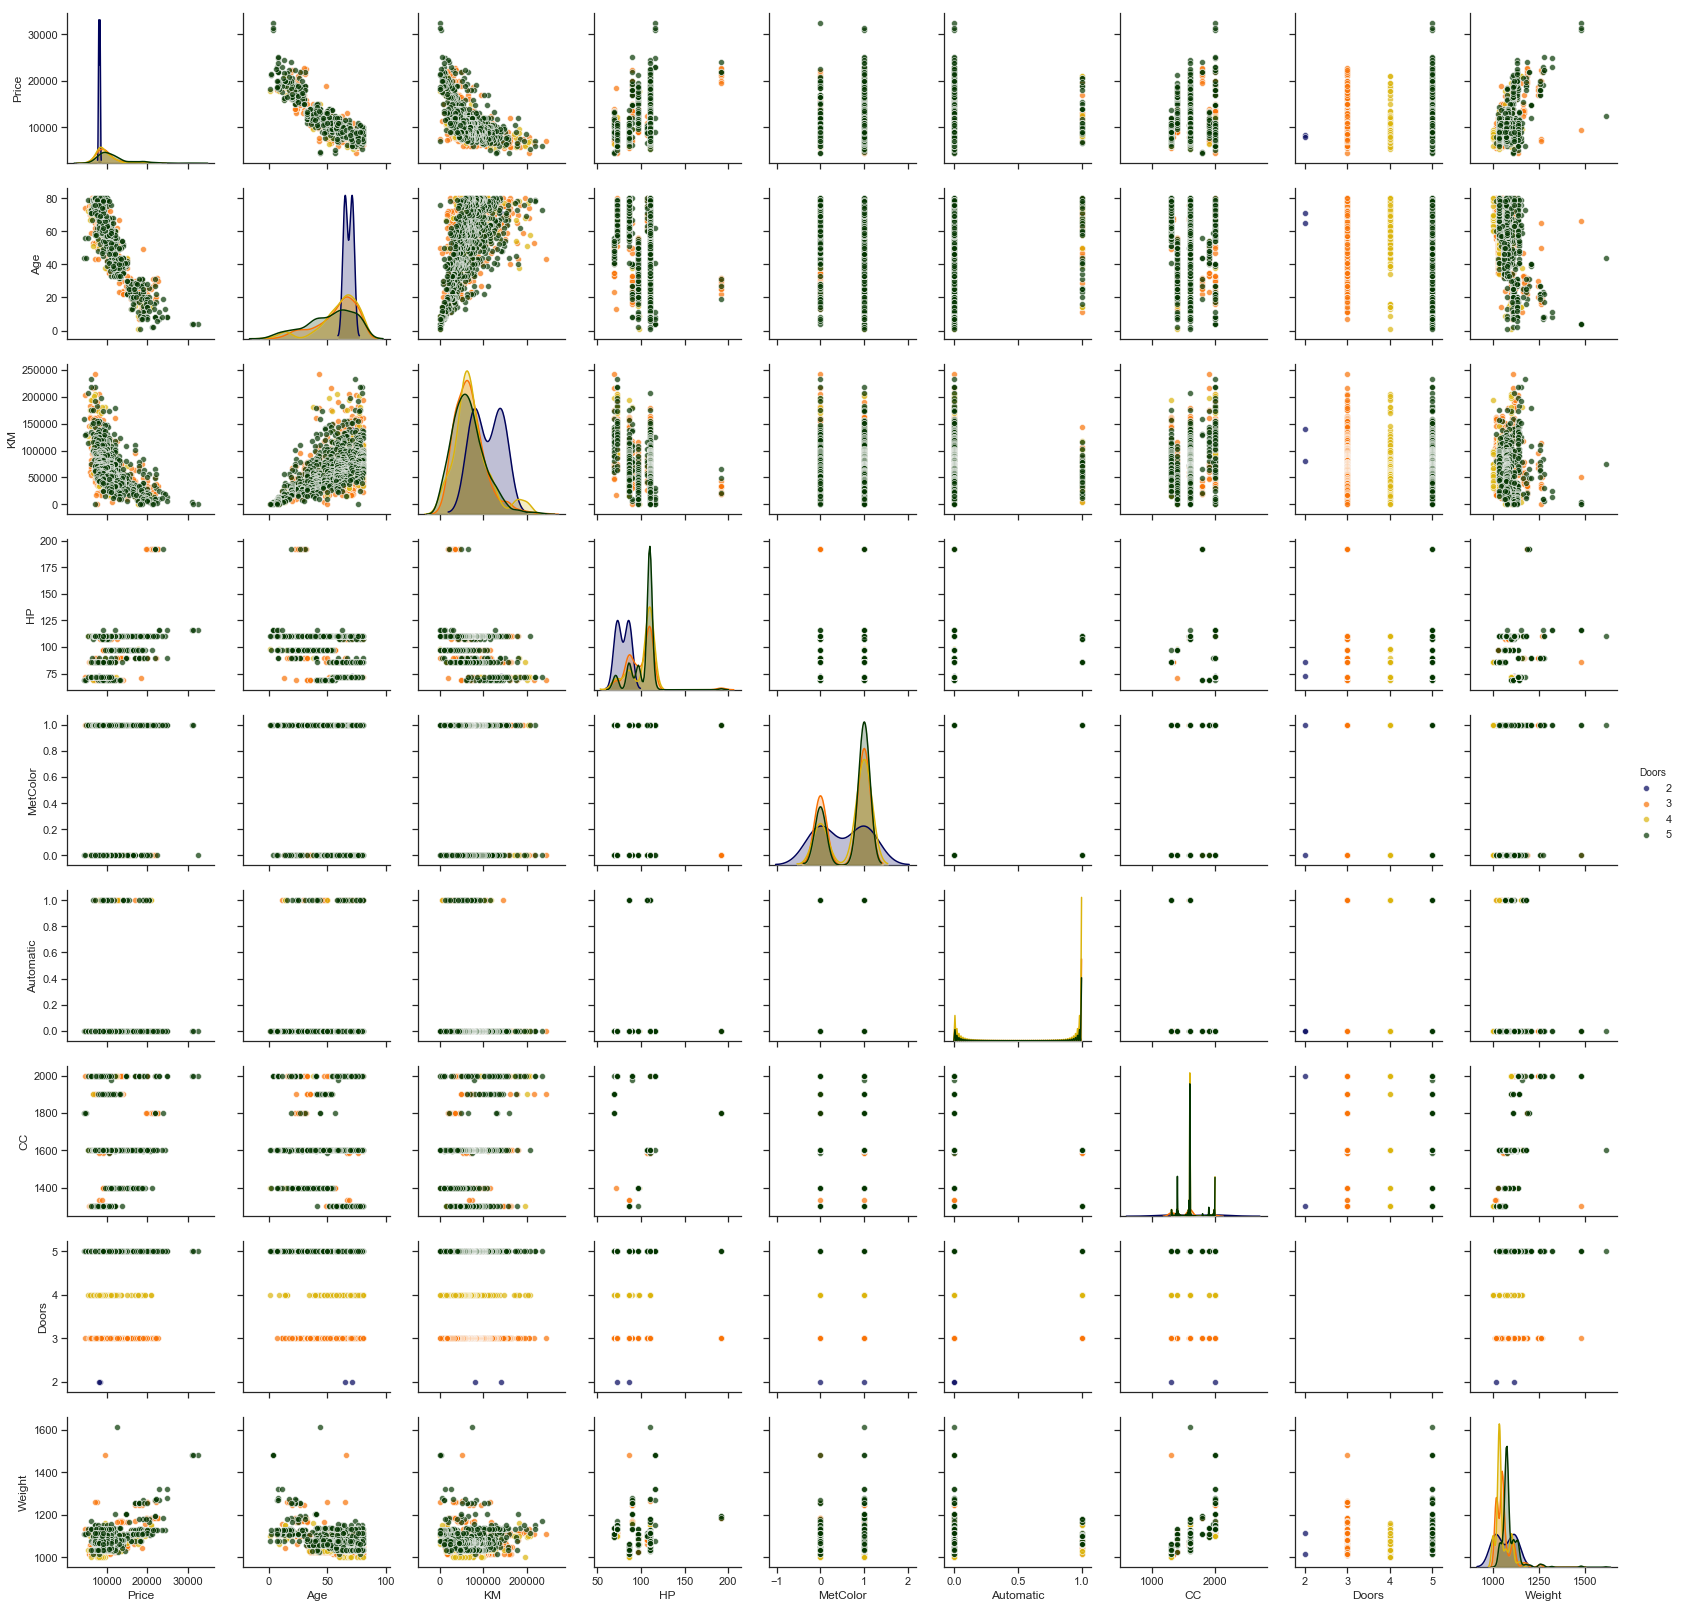

In [11]:
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'orange','gold','dark green'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(data, hue = 'Doors', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True));

In [12]:

data.MetColor.value_counts()
data.Doors.nunique()

4

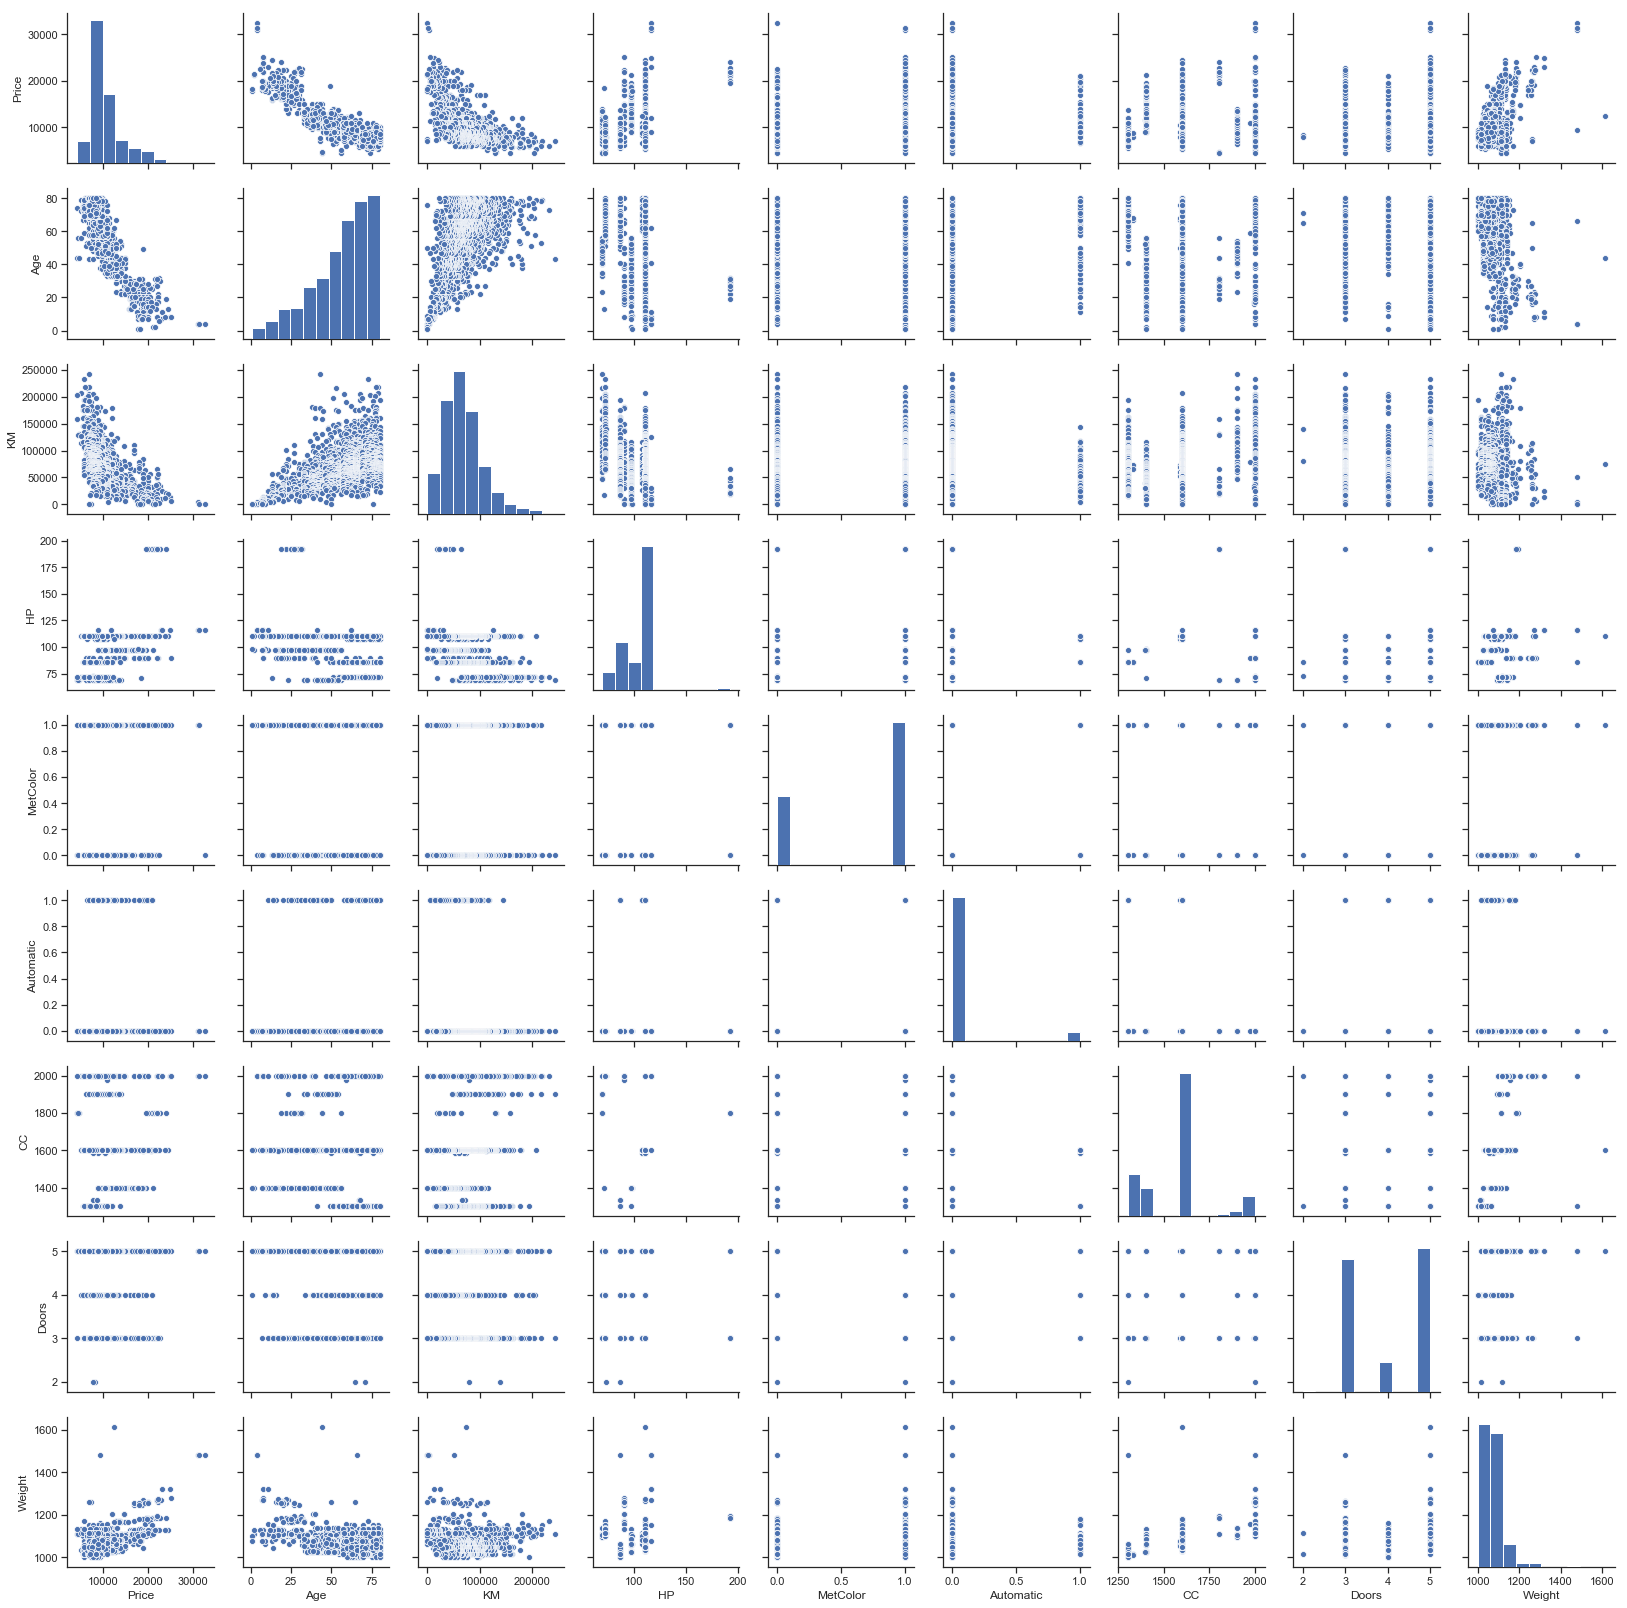

In [11]:
#pairplot without hue
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

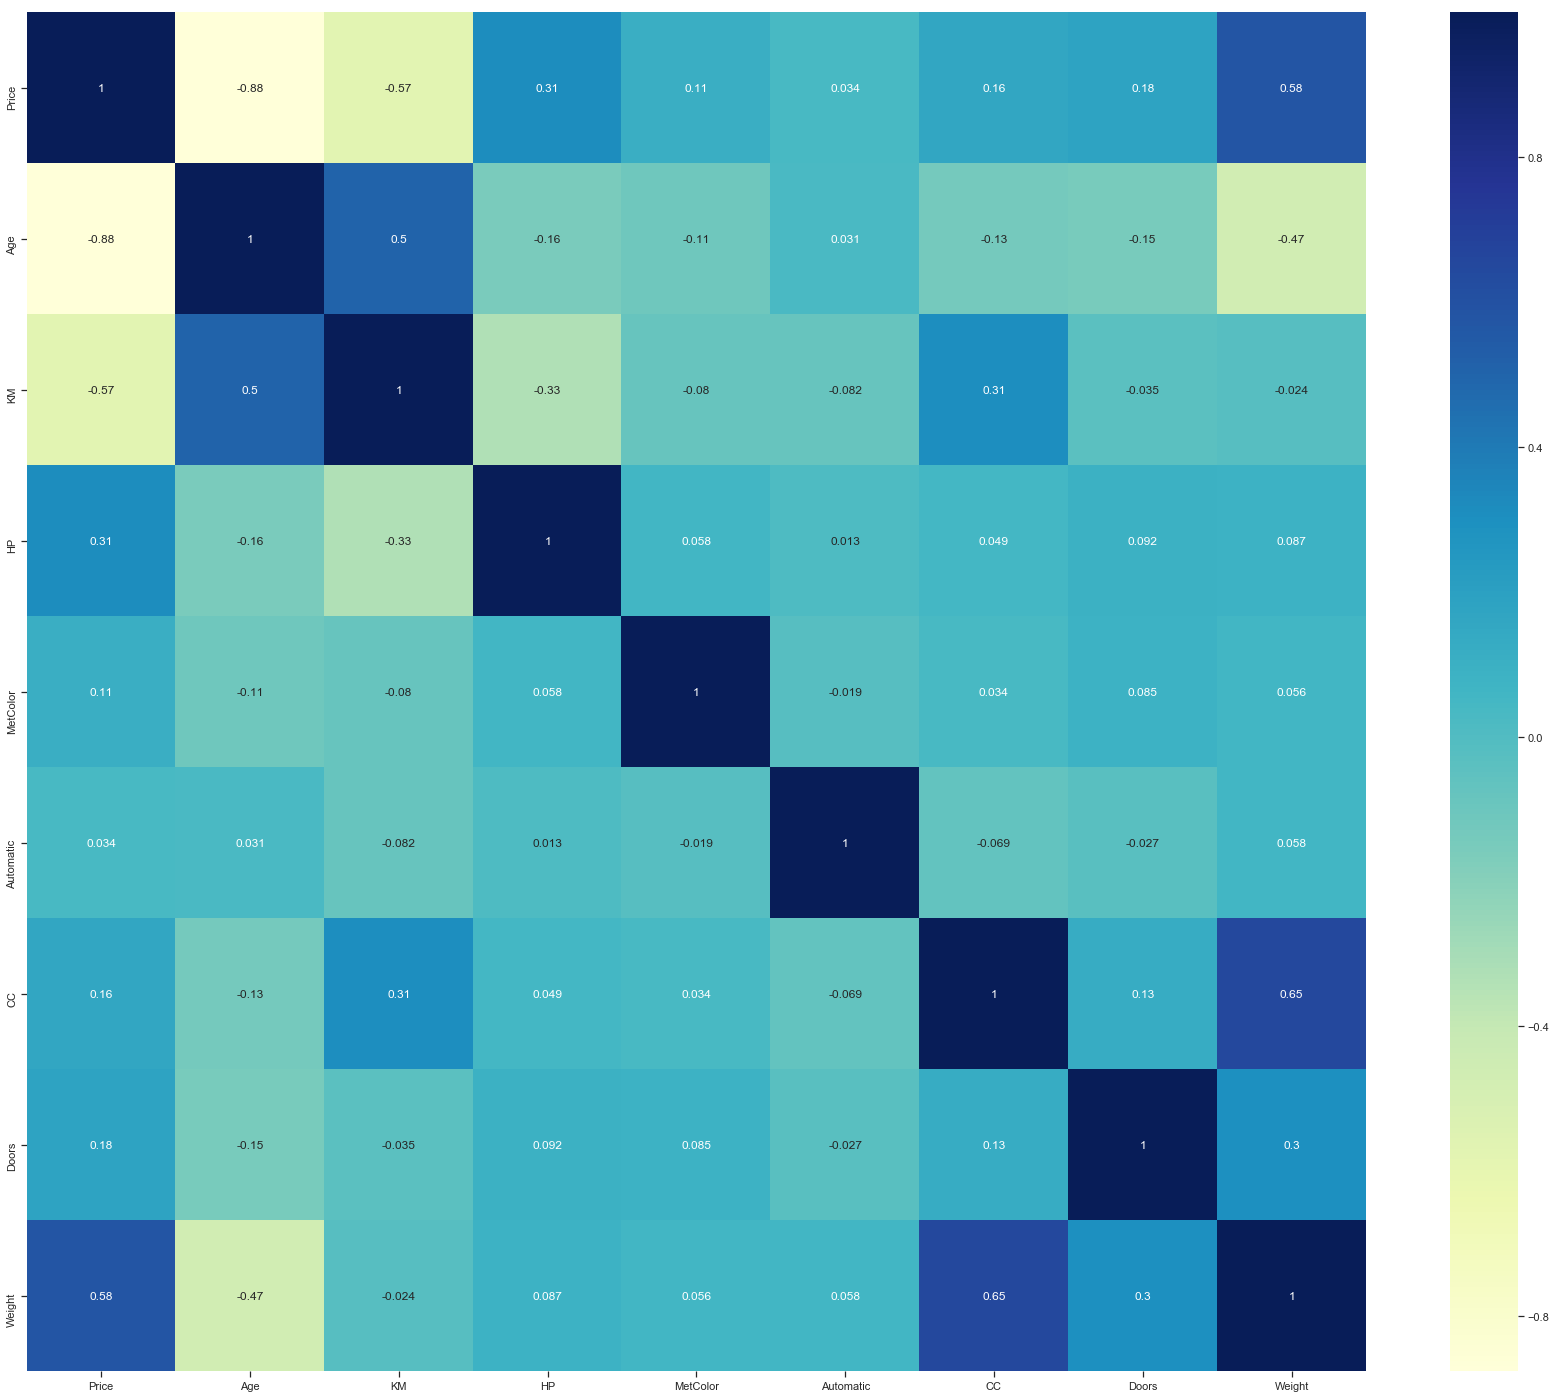

In [12]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

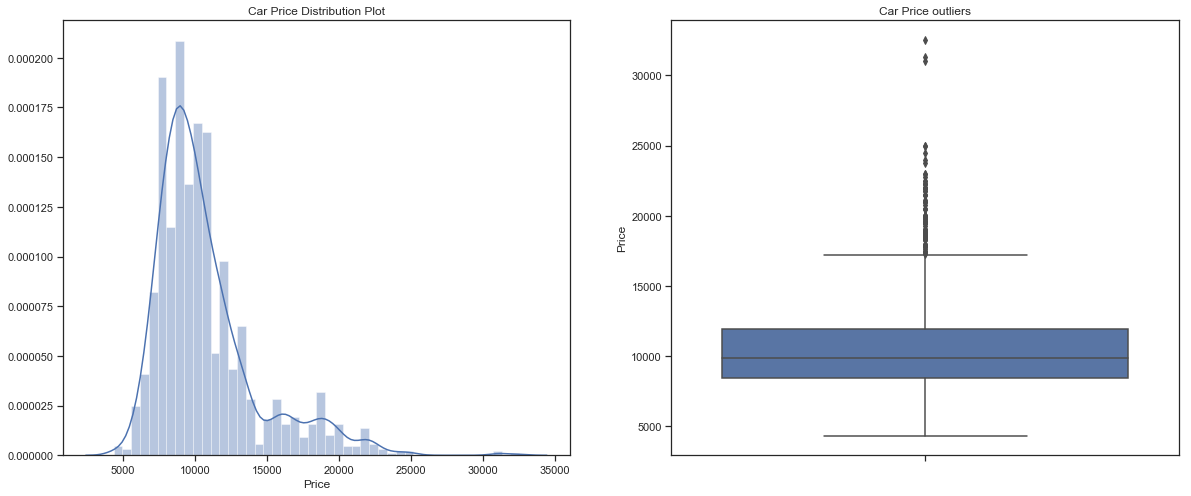

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.Price)

plt.subplot(1,2,2)
plt.title('Car Price outliers')
sns.boxplot(y=data.Price)

plt.show()

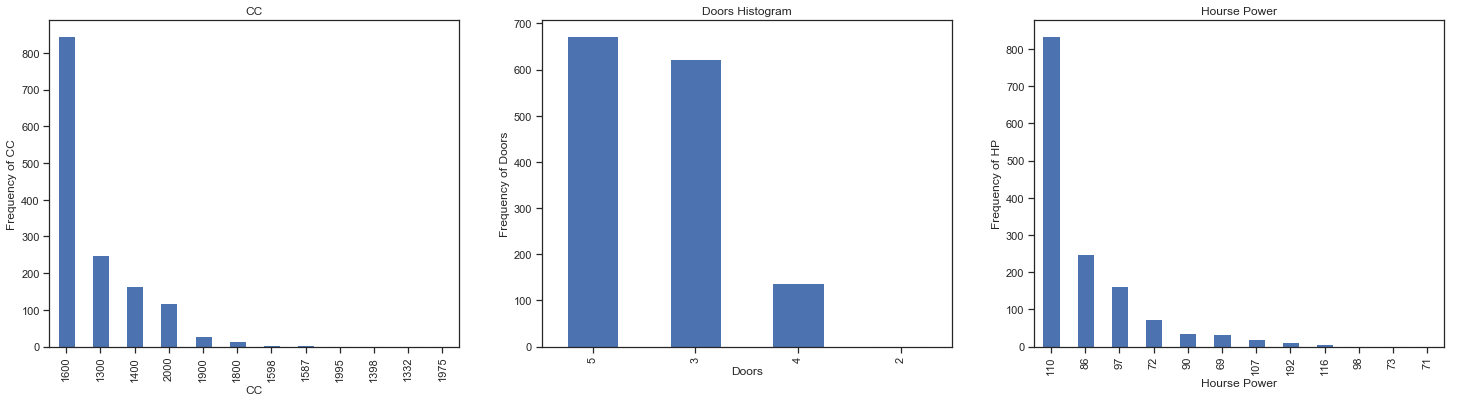

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CC.value_counts().plot('bar')
plt.title('CC')
plt1.set(xlabel = 'CC', ylabel='Frequency of CC')

plt.subplot(1,3,2)
plt1 = data.Doors.value_counts().plot('bar')
plt.title('Doors Histogram')
plt1.set(xlabel = 'Doors', ylabel='Frequency of Doors')

plt.subplot(1,3,3)
plt1 = data.HP.value_counts().plot('bar')
plt.title('Hourse Power')
plt1.set(xlabel = 'Hourse Power', ylabel='Frequency of HP')

plt.show()

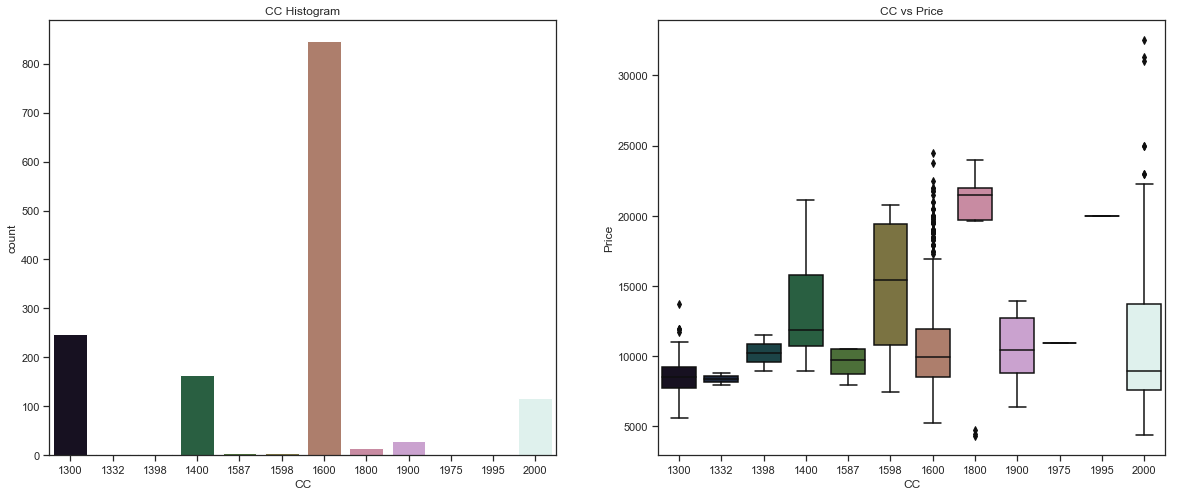

In [15]:
#sounds like three plots have minority groups
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('CC Histogram')
sns.countplot(data.CC, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('CC vs Price')
sns.boxplot(x=data.CC, y=data.Price, palette=("cubehelix"))

plt.show()

In [16]:
data.CC.value_counts() # we cannot read histogram data for 1975, 1332,.. so better to count

1600    846
1300    248
1400    164
2000    118
1900     30
1800     14
1598      4
1587      4
1995      2
1398      2
1332      2
1975      1
Name: CC, dtype: int64

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


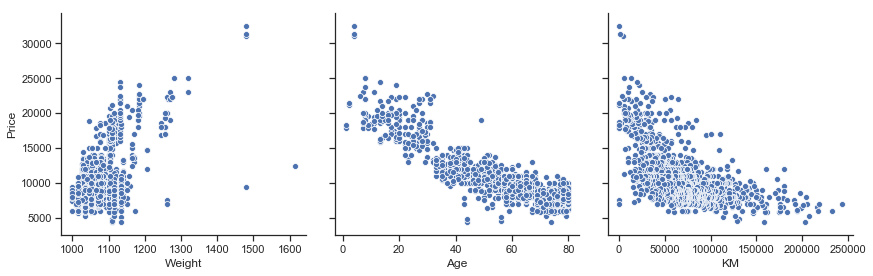

In [17]:
#better view of correlation 

sns.pairplot(data, x_vars=['Weight','Age','KM'], y_vars='Price',size=4, aspect=1, kind='scatter')
    



In [18]:
np.corrcoef(data['Weight'], data['Age'])[0, 1]



-0.46648432886178764

In [19]:
np.corrcoef(data['Age'], data['KM'])[0, 1]


0.50457456140833234

In [20]:
data.corr() #full correlation



,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.107604,0.033928,0.159897,0.183604,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.107169,0.031354,-0.129564,-0.146929,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.079864,-0.082168,0.305331,-0.035193,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.058272,0.013313,0.049430,0.091803,0.087143
MetColor,0.107604,-0.107169,-0.079864,0.058272,1.000000,-0.019222,0.033870,0.084796,0.056097
Automatic,0.033928,0.031354,-0.082168,0.013313,-0.019222,1.000000,-0.069060,-0.027492,0.058499
CC,0.159897,-0.129564,0.305331,0.049430,0.033870,-0.069060,1.000000,0.125410,0.650098
Doors,0.183604,-0.146929,-0.035193,0.091803,0.084796,-0.027492,0.125410,1.000000,0.301734
Weight,0.575869,-0.466484,-0.023969,0.087143,0.056097,0.058499,0.650098,0.301734,1.000000


In [21]:

newdata=pd.get_dummies(data,columns=['FuelType'],drop_first=False)
#
#

In [22]:
#do not change MetColor, Automatic
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Age', 'Price', 'KM', 'HP', 'CC','Weight','Doors']
newdata[num_vars] = scaler.fit_transform(newdata[num_vars])



In [23]:
newdata.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,0.325044,0.278481,0.193355,0.170732,1,0,1.0,0.333333,0.268293,0,1,0
1,0.333925,0.278481,0.300149,0.170732,1,0,1.0,0.333333,0.268293,0,1,0
2,0.341030,0.291139,0.171647,0.170732,1,0,1.0,0.333333,0.268293,0,1,0
3,0.376554,0.316456,0.197528,0.170732,0,0,1.0,0.333333,0.268293,0,1,0
4,0.333925,0.367089,0.158433,0.170732,0,0,1.0,0.333333,0.276423,0,1,0


In [24]:
y=newdata['Price']
X=newdata.drop(['Price'], axis=1)



In [25]:
#RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = LinearRegression()
lm.fit(X,y)
rfe = RFE(lm, 8) # why 8 features? no logical resason just want to keep 8 out of 11 cols from the beginning 
rfe = rfe.fit(X, y)

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
list(zip(X.columns,rfe.support_,rfe.ranking_))



[('Age', True, 1),
 ('KM', True, 1),
 ('HP', True, 1),
 ('MetColor', False, 3),
 ('Automatic', False, 2),
 ('CC', True, 1),
 ('Doors', False, 4),
 ('Weight', True, 1),
 ('FuelType_CNG', True, 1),
 ('FuelType_Diesel', True, 1),
 ('FuelType_Petrol', True, 1)]

In [27]:
X.columns[rfe.support_]
X_train_rfe = X[X.columns[rfe.support_]]
print X_train_rfe.head()

        Age        KM        HP   CC    Weight  FuelType_CNG  FuelType_Diesel  \
0  0.278481  0.193355  0.170732  1.0  0.268293             0                1   
1  0.278481  0.300149  0.170732  1.0  0.268293             0                1   
2  0.291139  0.171647  0.170732  1.0  0.268293             0                1   
3  0.316456  0.197528  0.170732  1.0  0.268293             0                1   
4  0.367089  0.158433  0.170732  1.0  0.276423             0                1   

   FuelType_Petrol  
0                0  
1                0  
2                0  
3                0  
4                0  


In [28]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)



In [29]:
X_train_new = build_model(X_train_rfe,y)



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1335.
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:12:59   Log-Likelihood:                 2362.5
No. Observations:                1435   AIC:                            -4709.
Df Residuals:                    1427   BIC:                            -4667.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3194      0.006     

In [30]:
#Calculating the Variance Inflation Factor
#why inf value? strong correlation between 3 FuelType cols, (1 exists for sure 2 others do not exist) 
#if I remove one of them in get_dummy it wont happen
checkVIF(X_train_new) #FuelTypes are classified binaty cols 1/(1-R2)=inf value



/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
6,FuelType_CNG,inf
7,FuelType_Diesel,inf
8,FuelType_Petrol,inf
4,CC,8.398945
3,HP,5.869322
5,Weight,2.750159
2,KM,1.988963
1,Age,1.896216
0,const,0.000000


In [31]:
#let's drop FuelType and run model again
yy=newdata['Price']
XX=newdata.drop(['Price','FuelType_CNG','FuelType_Diesel','FuelType_Petrol'], axis=1)
lm = LinearRegression()
lm.fit(XX,yy)
rfe = RFE(lm, 5)
rfe = rfe.fit(XX, yy)
XX_train_rfe = XX[XX.columns[rfe.support_]]

XX_train_new = build_model(XX_train_rfe,yy)
checkVIF(XX_train_new) ##I think vif's are small and P values tell to keep all 5 features

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:13:05   Log-Likelihood:                 2342.6
No. Observations:                1435   AIC:                            -4673.
Df Residuals:                    1429   BIC:                            -4642.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4267      0.006     65.804      0.0

,Features,VIF
0,const,26.860683
5,Weight,2.333759
4,CC,2.159608
2,KM,1.876290
1,Age,1.865936
3,HP,1.164962


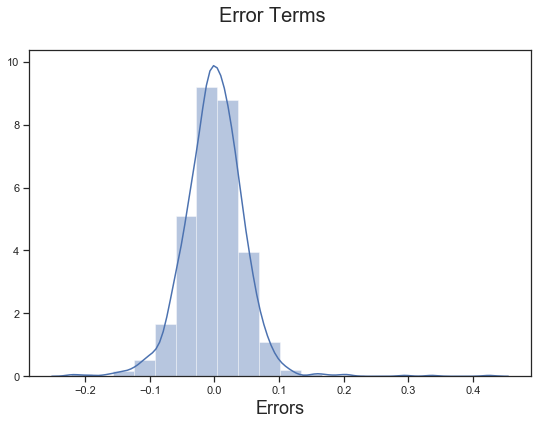

In [32]:

#Residual Analysis

lm.fit(XX,yy)
predicted_yy = lm.predict(XX)
fig = plt.figure(figsize=(9,6))
sns.distplot((predicted_yy - yy), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()
#Error terms are distributed around zero which indicates that model prediction is not by chance.
#note that I trained all dataset!

In [33]:
#another approch to choose features based of adj_R2
#RFE
#here adj_R2 with tolerance of 0.001 offers to drop "MetColor" and "Doors" for lm model
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
Listfeatures=X.columns.tolist()

adj_R2 = []
feature_set = []
max_adj_R2_so_far = 0
n = len(X)
k = 11 #number of columns
for i in range(1,k+1):
    selector = RFE(LinearRegression(), i,verbose=0)
    selector = selector.fit(X, y)
    current_R2 = selector.score(X,y)
    current_adj_R2 = 1-(n-1)*(1-current_R2)/(n-i-1) 
    adj_R2.append(current_adj_R2)
    feature_set.append(selector.support_)
    if current_adj_R2- max_adj_R2_so_far > 0.001:
        max_adj_R2_so_far = current_adj_R2
        selected_features=selector.support_
        final_ranking=list(selector.ranking_)
    

for i in range(0,len(Listfeatures)):
    case={final_ranking[i]:Listfeatures[i]}
    print case
   
    


{1: 'Age'}
{1: 'KM'}
{1: 'HP'}
{2: 'MetColor'}
{1: 'Automatic'}
{1: 'CC'}
{3: 'Doors'}
{1: 'Weight'}
{1: 'FuelType_CNG'}
{1: 'FuelType_Diesel'}
{1: 'FuelType_Petrol'}


In [34]:
y=newdata['Price']
X=newdata.drop(['Price','MetColor','Doors'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=0)
lm = LinearRegression()


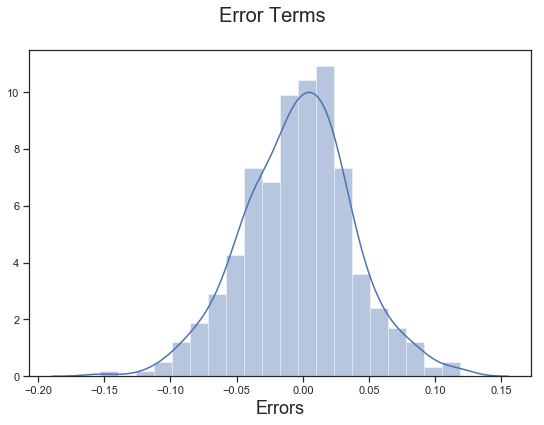

In [35]:
#Recidual Analysis

lm.fit(X_train,y_train)
predicted_y = lm.predict(X_test)
fig = plt.figure(figsize=(9,6))
sns.distplot((predicted_y - y_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show() #still sounds good but peak is not located at zero
#MSE,R2,adjustedR2 can evaluate the model

In [36]:
# For loop to find the best K number:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors #for regression
from sklearn.model_selection import cross_val_score
scores = []
model = KNeighborsClassifier()
model.get_params()

#we can gridsearch the default knn later    

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

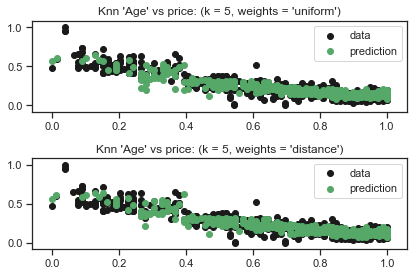

In [37]:
#visualizing one features vs target for two weight functions :uniform and weights
#uniform: uniform weights. All points in each neighborhood are weighted equally.
#distance’ : weight points by the inverse of their distance. in this case, 
#closer neighbors of a query point will have a greater influence than neighbors which are further away.
y=newdata['Price']
X=newdata.drop(['Price'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


#model = KNeighborsClassifier(n_neighbors=5,weights='uniform') #doesnt work for regression example
#use the following : neighbors.KNeighborsRegressor

n_neighbors = 5 #default 

for i, weights in enumerate(['uniform', 'distance']):
    model = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    plt.subplot(2, 1, i + 1)
    #can replace X_train.iloc[:,ii] with ii=0,1,2,3,len(X) for this example:Age or KM' or'HP' or ...,
    # here: X_train.iloc[:,0]=X_train['Age']
    plt.scatter(X_train.iloc[:,0],y_train, c='k', label='data')
    plt.scatter(X_test.iloc[:,0], pd.Series(y_pred), c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("Knn 'Age' vs price: (k = %i, weights = '%s')" % (n_neighbors,weights))

    plt.tight_layout()



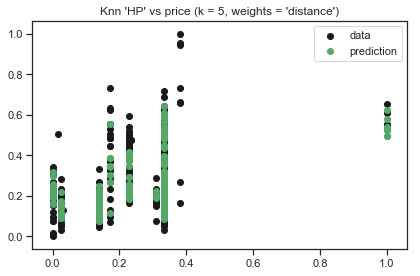

In [38]:
#  
plt.scatter(X_train.iloc[:,2],y_train, c='k', label='data')
plt.scatter(X_test.iloc[:,2], pd.Series(y_pred), c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Knn 'HP' vs price (k = %i, weights = '%s')" % (n_neighbors,weights))

plt.tight_layout()
#can we inverse the y_pred here? 
#no! I didnt use original data and have used 'newdata' , plus easier to use narray from the beggining 

#

In [39]:
newdata_2=pd.get_dummies(data,columns=['FuelType'],drop_first=False)
from sklearn.preprocessing import StandardScaler
y=newdata_2['Price']
X=newdata_2.drop(['Price'], axis=1)

"""
#first 
sc_X=StandardScaler()
sc_y=StandardScaler()
#this time scale all cols including FuelTypes

X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y.reshape(len(y),1)).reshape(len(y))
"""

'\n#first \nsc_X=StandardScaler()\nsc_y=StandardScaler()\n#this time scale all cols including FuelTypes\n\nX=sc_X.fit_transform(X)\ny=sc_y.fit_transform(y.reshape(len(y),1)).reshape(len(y))\n'

In [40]:
#second
#split data
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
newdata.head(2)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,0.325044,0.278481,0.193355,0.170732,1,0,1.0,0.333333,0.268293,0,1,0
1,0.333925,0.278481,0.300149,0.170732,1,0,1.0,0.333333,0.268293,0,1,0


In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [42]:
sc_X=StandardScaler()
sc_y=StandardScaler()
#this time scale all cols including FuelTypes

X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y.reshape(len(y),1)).reshape(len(y))



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print X_train.shape
print X_test.shape
print model.get_params()
model=SVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



(1004, 11)
(431, 11)
{'n_neighbors': 5, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'distance', 'leaf_size': 30}


/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
#do not run it twice!
y_pred=sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)).reshape(len(y_pred))
y_test=sc_y.inverse_transform(y_test.reshape(len(y_test),1)).reshape(len(y_test))

#

Text(0.5,1,'SVM, kernel:rbf')

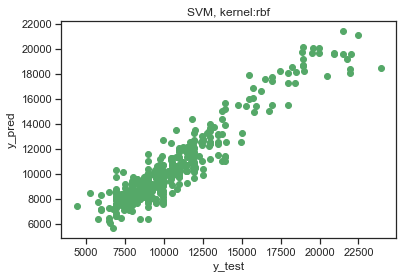

In [44]:

plt.scatter(y_test, y_pred, c='g', label='prediction') # close to linear which is good
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title("SVM, kernel:rbf")

In [45]:
import time

#Gridsearch
y=newdata_2['Price'] #fresh start since I used sc_y.inverse_transform
X=newdata_2.drop(['Price'], axis=1)
sc_X=StandardScaler()
sc_y=StandardScaler()
#this time scale all cols including FuelTypes

X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y.reshape(len(y),1)).reshape(len(y))




svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})


t0 = time.time()
svr.fit(X, y)


svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

sv_ratio = float(svr.best_estimator_.support_.shape[0]) / len(X_train)
print("Support vector ratio: %.3f" % sv_ratio)

y_pred_svr = svr.predict(X)
#-------------------------------------------------------------------
sv_ind = svr.best_estimator_.support_

/Users/niloofarzarifi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


SVR complexity and bandwidth selected and model fitted in 63.392 s
Support vector ratio: 1.021


In [47]:
print sv_ratio
print svr.best_params_
#?????????????????????????
svr.best_estimator_.support_.shape[0] #726

svr.best_estimator_.support_ #what is this

1.02091633466
{'C': 10.0, 'gamma': 0.01}


array([   0,    1,    2, ..., 1431, 1433, 1434], dtype=int32)

In [48]:

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
kr.fit(X, y)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)



y_pred_kr = kr.predict(X)
print kr.best_params_


print(np.round(kr.best_score_,3))
print kr.score(X,y)

KRR complexity and bandwidth selected and model fitted in 11.947 s
{'alpha': 0.01, 'gamma': 0.01}
0.197
0.920477608948


In [49]:
#let's apply best_params on X_train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
svr=SVR(kernel='rbf', gamma=0.01, C=10,verbose=True)
svr.fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)
kr=KernelRidge(kernel='rbf', gamma=0.01,alpha=0.01)
kr.fit(X_train,y_train) 
y_pred_kr=kr.predict(X_test)

[LibSVM]

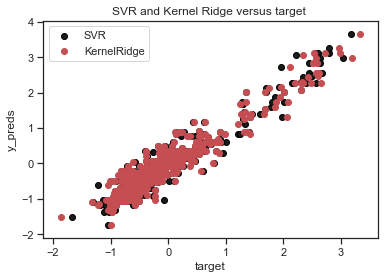

In [50]:
plt.scatter(y_pred_svr, y_test, c='k', label='SVR', zorder=1,
            edgecolors=(0, 0, 0))
plt.scatter(y_pred_kr, y_test, c='r',
         label='KernelRidge')

plt.xlabel('target')
plt.ylabel('y_preds')
plt.title('SVR and Kernel Ridge versus target ')
plt.legend()
 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

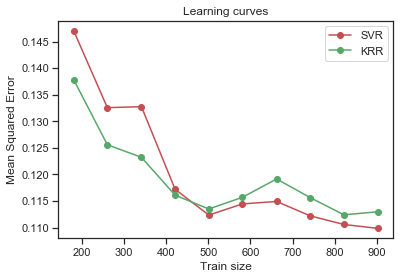

In [51]:
#it converges the training_size
# Visualize learning curves
plt.figure()


train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X_train, y_train, train_sizes=np.linspace(0.2, 1, 10),
                   scoring="neg_mean_squared_error", cv=10,verbose=0)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X_train, y_train, train_sizes=np.linspace(0.2, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")


In [52]:
#Accuracy
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
#both present R2_squared
print r2_score(y_test, y_pred_svr) 
print ("R2_score: ",svr.score(X_test,y_test))
#MSE
from sklearn.metrics import mean_squared_error
print ("mean_squared_error: ",mean_squared_error(y_test, y_pred_svr))
#Mean Squared Logarithmic Error cannot be used when targets contain negative values.
#from sklearn.metrics import mean_squared_log_error
#print mean_squared_log_error(y_test, y_pred_svr)  
from sklearn.metrics import median_absolute_error
print ("median_absolute_error", median_absolute_error(y_test, y_pred_svr))

print ("r2_square_variance_weighted: ", r2_score(y_test, y_pred_svr, multioutput='variance_weighted')) #  
print ("r2_square_uniform_average: ", r2_score(y_test, y_pred_svr, multioutput='uniform_average'))
print ("r2_square_raw_values: ", r2_score(y_test, y_pred_svr, multioutput='raw_values'))

0.905346960467
('R2_score: ', 0.90534696046715379)
('mean_squared_error: ', 0.080274097645830197)
('median_absolute_error', 0.16770406359004997)
('r2_square_variance_weighted: ', 0.90534696046715379)
('r2_square_uniform_average: ', 0.90534696046715379)
('r2_square_raw_values: ', array([ 0.90534696]))


In [156]:
#https://github.com/scikit-learn/scikit-learn/blob/master/doc/modules/model_evaluation.rst


In [53]:
"""
##cross_val_score
Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision'
, 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted',
'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error',
'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score',
'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 
'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


"""

"\n##cross_val_score\nValid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision'\n, 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted',\n'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error',\n'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score',\n'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', \n'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']\n\n\n"

Text(0.5,1,'Finding optimal K')

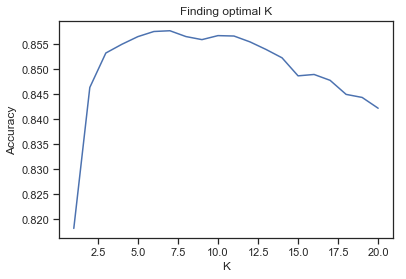

In [54]:
#Knn
# For loop to find the best K number:

y=newdata_2['Price']
X=newdata_2.drop(['Price'], axis=1)
sc_X=StandardScaler()
sc_y=StandardScaler()
#this time scale all cols including FuelTypes

X=sc_X.fit_transform(X)
#y=sc_y.fit_transform(y.reshape(len(y),1)).reshape(len(y))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#-----------------------------------------------------------------------------

from sklearn.model_selection import cross_val_score
scores = []
for x in range(1,21):
    model = neighbors.KNeighborsRegressor(n_neighbors=x,weights='distance')
    scores.append(cross_val_score(model,X_train,y_train,cv=4,scoring='r2').mean())
    
import matplotlib.pyplot as plt
plt.plot(range(1,21),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")
#---------------------------------------------------------------------------



In [55]:


model = neighbors.KNeighborsRegressor(n_neighbors=9,weights='distance') # n_neighbors=1 is the K number, the highest accuracy from the above loop
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
print r2_score(y_test, y_pred_knn)

0.856953121553


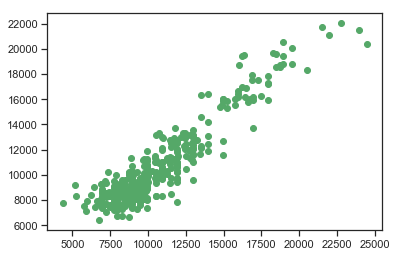

In [56]:
plt.scatter(y_test, y_pred_knn, c='g', label='prediction') #must be close to linear!!!



In [57]:
##RF
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [58]:
X.shape

(1435, 11)

In [59]:

model = RandomForestRegressor()  #0.88 score(X_test,y_test) with default RF for X_train and y_train
model.get_params()


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
# Number of trees in random forest
n_estimators=[10,50,15,20]

max_features = ['auto', 'sqrt']


max_depth=[10,20,30]


# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestRegressor()
model_RF_Grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=5,verbose=2) #scoring is R2
model_RF_Grid.fit(X, y)
model_RF_Grid.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 -   0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV] bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimato

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=auto, max_depth=10 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, m

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=1

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=15, mi

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=50, m

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=10, n_estimat

[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=True, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=15, n_estimat

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 -   0.3s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 -   0.3s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 -   0.3s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 -   0.3s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=auto, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=10 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=10 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 -   0.3s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=30, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=10, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=15, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=15, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=15, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=20 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=20, min_samples_split=30, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_est

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=15, min_samples_split=20, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=20, min_samples_split=20, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=10, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=15, min_samples_split=10, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=50, min_samples_split=30, max_features=auto, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=5, n_estimators=50, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=5, n_estimat

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=10, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=10, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=50, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=10, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=10, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 -   0.0s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=10, min_samples_split=20, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, 

[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 -   0.1s
[CV] bootstrap=False, min_samples_leaf=15, n_estimators=20, min_samples_split=30, max_features=sqrt, max_depth=30 
[CV]  bootstrap=False, min_samples_leaf=15, 

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  3.2min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 10}

In [ ]:
"""
{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 10}
"""

In [64]:
model = RandomForestRegressor(bootstrap=True,max_depth=20,max_features='auto',
                              min_samples_leaf=10,min_samples_split=30,n_estimators=10)
model.fit(X_train,y_train)
print model.score(X_test,y_test) #0.87 which means 1% less than default



0.863279842861


In [65]:
filter_col=['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
            'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']
pd.DataFrame({'feature': filter_col,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)




,feature,importance
0,Age,0.904332
7,Weight,0.054372
1,KM,0.019428
2,HP,0.016670
5,CC,0.003185
6,Doors,0.000951
3,MetColor,0.000871
4,Automatic,0.000190
8,FuelType_CNG,0.000000
9,FuelType_Diesel,0.000000


In [66]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [67]:
model.fit(X_train, y_train)  
y_pred_ada=model.predict(X_train) 
model.score(X_test,y_test)

0.85173784723227741

In [68]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(X_train, y_train)


model.score(X_test, y_test)

0.8699725131215249